In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [54]:
data = pd.read_csv('insurance_data.csv')

In [56]:
data['Claims_Severity'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [58]:
data['Claims_Severity'] = data['Claims_Severity'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 10000 non-null  int64 
 1   Is_Senior                           10000 non-null  int64 
 2   Marital_Status                      10000 non-null  object
 3   Married_Premium_Discount            10000 non-null  int64 
 4   Prior_Insurance                     10000 non-null  object
 5   Prior_Insurance_Premium_Adjustment  10000 non-null  int64 
 6   Claims_Frequency                    10000 non-null  int64 
 7   Claims_Severity                     10000 non-null  int64 
 8   Claims_Adjustment                   10000 non-null  int64 
 9   Policy_Type                         10000 non-null  object
 10  Policy_Adjustment                   10000 non-null  int64 
 11  Premium_Amount                      10000 non-null  int

In [62]:
#Check missing values
data.isnull().sum()

Age                                   0
Is_Senior                             0
Marital_Status                        0
Married_Premium_Discount              0
Prior_Insurance                       0
Prior_Insurance_Premium_Adjustment    0
Claims_Frequency                      0
Claims_Severity                       0
Claims_Adjustment                     0
Policy_Type                           0
Policy_Adjustment                     0
Premium_Amount                        0
Safe_Driver_Discount                  0
Multi_Policy_Discount                 0
Bundling_Discount                     0
Total_Discounts                       0
Source_of_Lead                        0
Time_Since_First_Contact              0
Conversion_Status                     0
Website_Visits                        0
Inquiries                             0
Quotes_Requested                      0
Time_to_Conversion                    0
Credit_Score                          0
Premium_Adjustment_Credit             0


## Feature Engineering

In [65]:
#Let's Calculate Discount Impact
data['Total_discount_impact'] = data['Total_Discounts'] / data['Premium_Amount']

In [67]:
#Let's Calculate Claim Ratio
data['Claim_Ratio'] = data['Claims_Adjustment']/ data['Premium_Amount']

In [69]:
data.to_csv('cleaned_insurance_data.csv',index = False)

In [77]:
data['Source_of_Lead'].unique()

array(['Agent', 'Online', 'Referral'], dtype=object)

## EDA

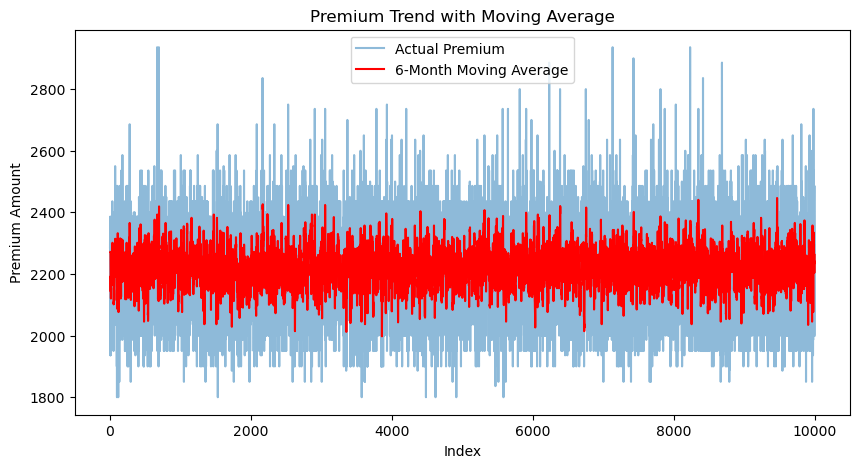

In [84]:
#2️⃣ Moving Average Analysis for Premium Trends

import matplotlib.pyplot as plt

data["Premium_MA"] = data["Premium_Amount"].rolling(window=6).mean()

plt.figure(figsize=(10,5))
plt.plot(data.index, data["Premium_Amount"], label="Actual Premium", alpha=0.5)
plt.plot(data.index, data["Premium_MA"], label="6-Month Moving Average", color="red")
plt.xlabel("Index")
plt.ylabel("Premium Amount")
plt.title("Premium Trend with Moving Average")
plt.legend()
plt.show()

In [88]:
# 3️⃣ Anomaly Detection in Claims Severity
from scipy.stats import zscore

data["Claims_Severity_Zscore"] = zscore(data["Claims_Severity"])
data["Anomaly"] = data["Claims_Severity_Zscore"].apply(lambda x: "Yes" if abs(x) > 2 else "No")

# Display anomalies
data[data["Anomaly"] == "Yes"]


,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region,Total_discount_impact,Claim_Ratio,Premium_MA,Claims_Severity_Zscore,Anomaly
9,48,0,Single,0,>5 years,0,1,2,200,Full Coverage,...,99,710,-50,Urban,100,0.021277,0.085106,2193.000000,2.444129,Yes
12,43,0,Single,0,1-5 years,50,1,2,200,Liability-Only,...,99,745,-50,Urban,100,0.022727,0.090909,2178.666667,2.444129,Yes
22,41,0,Single,0,>5 years,0,0,2,0,Full Coverage,...,3,749,-50,Urban,100,0.023256,0.000000,2220.333333,2.444129,Yes
29,35,0,Divorced,0,<1 year,100,0,2,0,Liability-Only,...,99,738,-50,Suburban,50,0.025000,0.000000,2164.333333,2.444129,Yes
34,52,0,Single,0,1-5 years,50,0,2,0,Full Coverage,...,99,701,-50,Urban,100,0.022727,0.000000,2243.000000,2.444129,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,29,0,Single,0,<1 year,100,1,2,200,Full Coverage,...,99,718,-50,Rural,0,0.043478,0.086957,2295.333333,2.444129,Yes
9943,67,1,Single,0,1-5 years,50,0,2,0,Full Coverage,...,99,763,-50,Urban,100,0.000000,0.000000,2231.000000,2.444129,Yes
9983,43,0,Married,86,<1 year,100,2,2,400,Full Coverage,...,2,714,-50,Urban,100,0.018275,0.146199,2224.000000,2.444129,Yes
9987,18,0,Married,86,1-5 years,50,0,2,0,Liability-Only,...,2,710,-50,Rural,0,0.000000,0.000000,2284.666667,2.444129,Yes


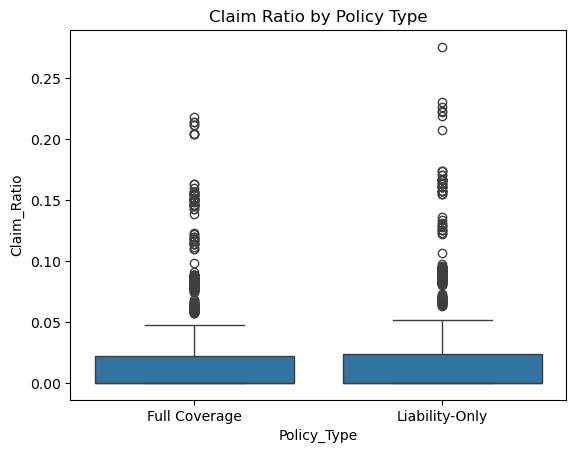

In [90]:
sns.boxplot(x="Policy_Type", y="Claim_Ratio", data=data)
plt.title("Claim Ratio by Policy Type")
plt.show()


In [100]:
data['Conversion_Status'].unique()

array([0, 1], dtype=int64)